# Exploring the Dynamics of Real Estate Prices: An Analytical Case Study

In [1]:
# Import pandas, matplotlib and seaborn libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset into Jupiter dataframe
real_estate_data = pd.read_excel(r'C:\Users\Mr. Seedball\Desktop\Portfolio\real_estate.xlsx')

In [3]:
# Dataset general overview
real_estate_data

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012917,32.0,8487882.0,10,2498298,12154024,37.9
1,2,2012917,19.5,3065947.0,9,2498034,12153951,42.2
2,3,2013583,13.3,5619845.0,5,2498746,12154391,47.3
3,4,2013500,13.3,5619845.0,5,2498746,12154391,54.8
4,5,2012833,5.0,3905684.0,5,2497937,12154245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013000,13.7,4082015.0,0,2494155,12150381,15.4
410,411,2012667,5.6,9045606.0,9,2497433,1215431,50.0
411,412,2013250,18.8,3909696.0,7,2497923,12153986,40.6
412,413,2013000,8.1,1048101.0,5,2496674,12154067,52.5


This dataset was cleaned using Excel. I followed these steps: 1. Removed datapoint duplicates 2. Fixed structural errors 3. Handled missing data by imputation 4. Filtered outliers, and 5. Standardized data formats

#### Now I need to convert the latitude and longitude values to their correct scale because they were stored in an integer format that represents the decimal degrees multiplied by a factor of 100,000. This will help to avoid floating point precision issues. 

In [4]:
# Preparing data for analysis: Correcting the scale of latitude and longitude
real_estate_data['latitude'] = real_estate_data['latitude'] / 100000
real_estate_data['longitude'] = real_estate_data['longitude'] / 100000

In [5]:
#To view the dataset columns after cleaning
real_estate_data.head()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012917,32.0,8487882.0,10,24.98298,121.54024,37.9
1,2,2012917,19.5,3065947.0,9,24.98034,121.53951,42.2
2,3,2013583,13.3,5619845.0,5,24.98746,121.54391,47.3
3,4,2013500,13.3,5619845.0,5,24.98746,121.54391,54.8
4,5,2012833,5.0,3905684.0,5,24.97937,121.54245,43.1


**Objective**: To explore the relationships between house prices and various factors such as (i) the age of the house, (ii) proximity to MRT stations, and (iii) the availability of convenience stores

## Hypothesis (H)

#### H1. Older houses have lower prices than newer ones 

#### H2. Houses closer to MRT stations are priced higher 

#### 3. The number of nearby convenience stores positively impacts house prices

#### 4. Property prices per unit area are influenced by geographical location 

# Hypothesis 1: House Age vs. House Price 

R-squared value: 0.04433848097791171


Text(0.05, 0.95, 'R²: 0.04')

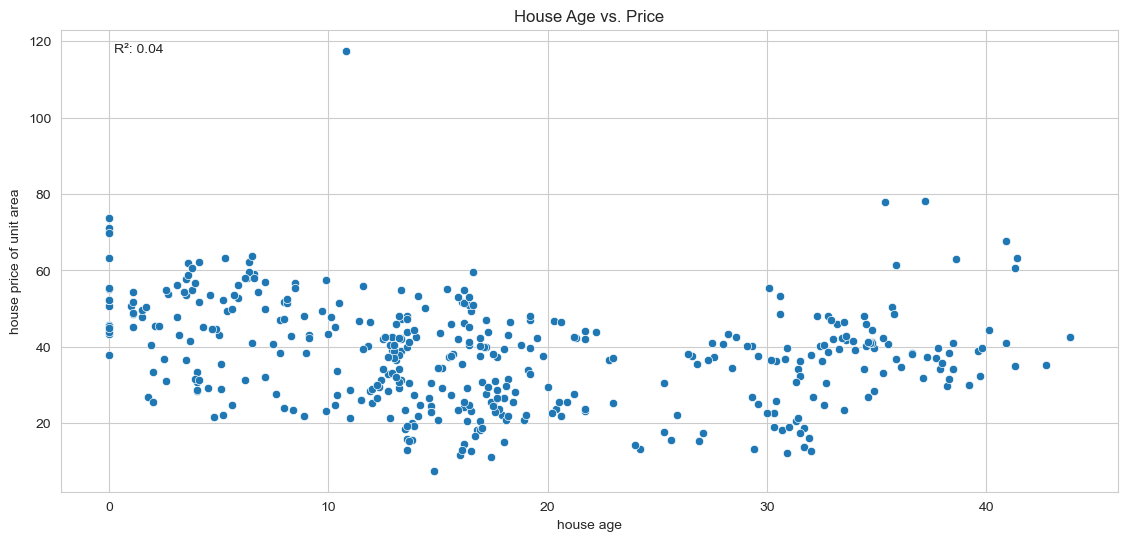

In [6]:
# Exploring the relationships between 'house price of unit area' and house age
import statsmodels.api as sm

# Prepare the data for modeling, add a constant to the independent variable to include the intercept in the model
X = sm.add_constant(real_estate_data['house age'])  # Independent variable
y = real_estate_data['house price of unit area']  # Dependent variable

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the R-squared value from the model's summary
print("R-squared value:", model.rsquared)

# Setting up the aesthetics for the scatterplots that will dtect relationship 
sns.set_style("whitegrid")

# Continue with graph plotting as in visualising
plt.figure(figsize=(30, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='house age', y='house price of unit area', data=real_estate_data)
plt.title('House Age vs. Price')

# Display the R-squared value on the plot
plt.text(0.05, 0.95, f'R²: {model.rsquared:.2f}', transform=plt.gca().transAxes)


The scatter plot does not show a strong linear relationship between house age and price. It indicates a slight tendency for older houses to have a broader range of prices, with both low and high values. The inverse correlation (R-squared value: 0.044) is just too weak. It supports the hypothesis that older houses MIGHT be priced lower. However, the relationship isn't as pronounced as expected. It could be that Landlords renovate their old houses to improve market pricing, or that houses are scarce hence the reason age does not affect the price because so many buyers are pursuing a very few houses. 

# Hypothesis 2: Proximity to MRT Station vs. Price

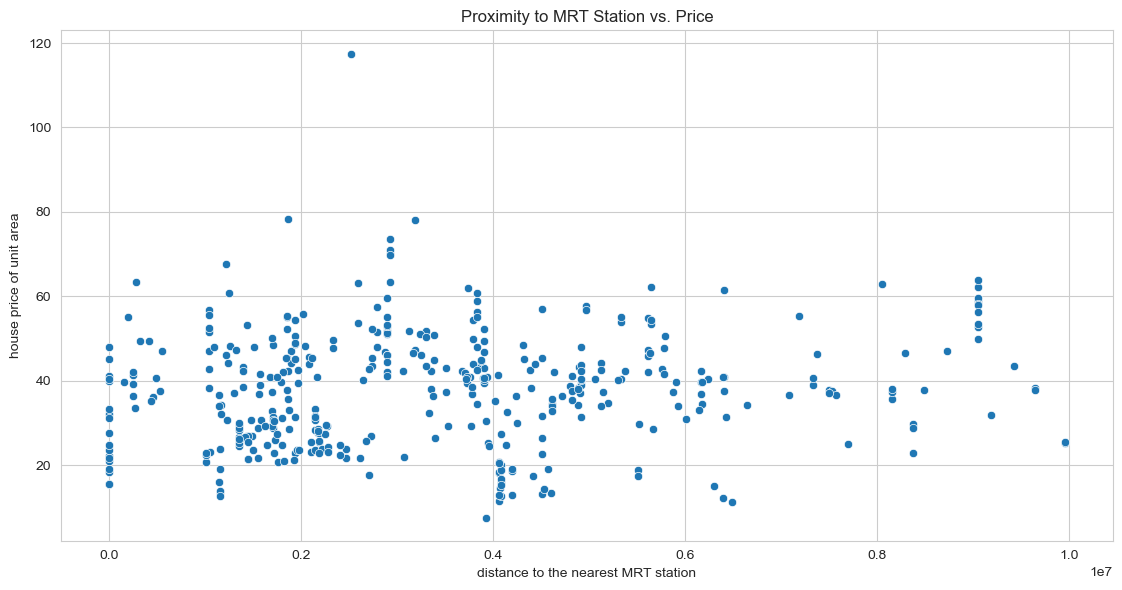

In [7]:
# Exploring the relationships between 'house price of unit area' and distance to the nearest MRT station
plt.figure(figsize=(22, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='distance to the nearest MRT station', y='house price of unit area', data=real_estate_data)
plt.title('Proximity to MRT Station vs. Price')
plt.tight_layout()
plt.show()

In [8]:
# Calculating correlations
correlations = real_estate_data[['house age', 'distance to the nearest MRT station', 'number of convenience stores', 'house price of unit area']].corr()

In [9]:
# Display the correlations
correlations

,house age,distance to the nearest MRT station,number of convenience stores,house price of unit area
house age,1.000000,0.057982,0.049593,-0.210567
distance to the nearest MRT station,0.057982,1.000000,0.135309,0.137936
number of convenience stores,0.049593,0.135309,1.000000,0.571005
house price of unit area,-0.210567,0.137936,0.571005,1.000000


House prices tend to be higher closer to MRT stations, especially for very short distances. This supports my hypothesis about the value of proximity to transit options, although the relationship (0.14) appears to be non-linear (see the scatter plot please) and weak one.

# Hypothesis 3: Number of Convenience Stores vs. House Price

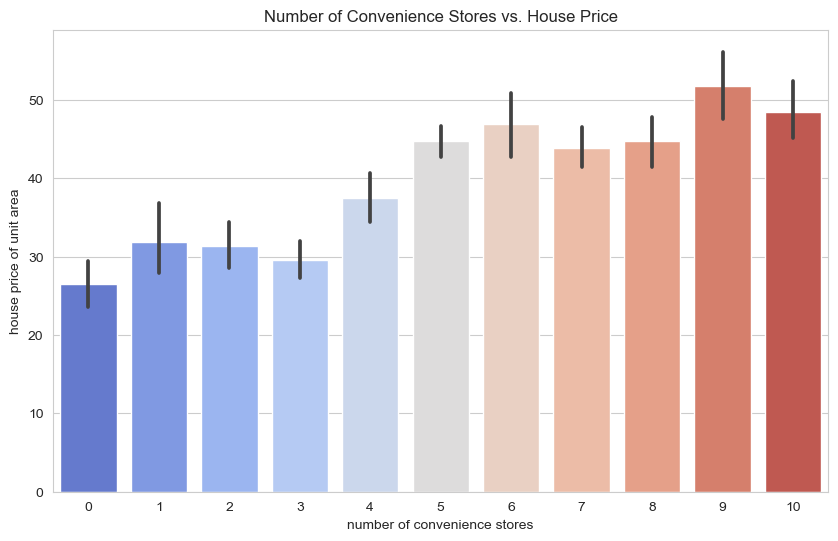

In [10]:
# Create a figure for the bar chart
plt.figure(figsize=(10, 6))

# Create a bar chart
sns.barplot(x='number of convenience stores', y='house price of unit area', data=real_estate_data, palette='coolwarm')

# Set the title of the bar chart
plt.title('Number of Convenience Stores vs. House Price')

# Show plot
plt.show()

The bar plot shows a clear strong positive (0.6) trend between the number of convenience stores and the average house price. It supports the hypothesis that accessibility to amenities like convenience stores positively influences house prices.

**Dataset dictionary**
Transaction date - the date of transaction
House age - the age of the house
Distance to the nearest MRT (Mass Rapid Transit) station - how far the house is to an MRT station
Number of convenience stores - how many convenience stores located near the house
Latitude - location co-ordinate
Longitude - location co-ordinate
House price of unit area the cost of each house
This dataset has a total of 414 data entries with no missing values
It was previously cleaned in the with Excel prior to importing it to Python for EDA

# Hypothesis 4: Geographic co-ordinates vs. House Price

In [11]:
import folium

# Create a base map
mean_lat = real_estate_data['latitude'].mean()
mean_lon = real_estate_data['longitude'].mean()
map = folium.Map(location=[mean_lat, mean_lon], zoom_start=12)

# Plot each house as a circle marker
for idx, row in real_estate_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,  # fixed radius for all markers
        fill=True,
        fill_color='blue' if row['house price of unit area'] < real_estate_data['house price of unit area'].median() else 'red',
        color=None,
        fill_opacity=0.7,
        popup=f"Price: {row['house price of unit area']}"
    ).add_to(map)

# Display the map
map

In [12]:
# Save the map as an HTML file
map.save('RealEstateMap.html')

In [13]:
# Now export the map to my folder
map.save('RealEstateMap.html')

In [14]:
# Statistical analysis of the map co-ordinates
import statsmodels.api as sm

# Prepare the data for regression
X = real_estate_data[['latitude', 'longitude']]
X = sm.add_constant(X)  # adding a constant for the intercept
y = real_estate_data['house price of unit area']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     house price of unit area   R-squared:                       0.012
Model:                                  OLS   Adj. R-squared:                  0.008
Method:                       Least Squares   F-statistic:                     2.582
Date:                      Tue, 16 Apr 2024   Prob (F-statistic):             0.0768
Time:                              22:14:45   Log-Likelihood:                -1665.1
No. Observations:                       414   AIC:                             3336.
Df Residuals:                           411   BIC:                             3348.
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

Location, by itself, doesn't tell us much about the price; In fact, it only explains about 1.2% of the reasons why house prices differ. This means that just knowing where the house is located on a map does very little to help us predict its price. Given that location alone isn’t a strong predictor, the next steps should be to look at a combination of factors to better understand and predict house prices.

# The end...!